<a href="https://colab.research.google.com/github/matheusbarroso/image_processing_with_python/blob/master/Chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Hands-On Image Processing with Python](https://www.packtpub.com/big-data-and-business-intelligence/hands-image-processing-python) 
[Matheus de Vasoncellos Barroso](https://github.com/matheusbarroso/image_processing_with_python) Solutions - 11/07/2020
## Chapter 1: Getting Started with Image Processing
Questions:
### 1. Use the `scikit-image` library's functions to read a collection of images and display them as a montage.




If we refer to the module's api [scikit-image](https://scikit-image.org/docs/stable/api/skimage.io.html) we can see that the methods of interest are:
- `skimage.io.imread_collection`
- `skimage.io.imshow_collection`
<br>

All there is left for us to do is to is to choose a collection of sample images to read. My google drive has some [sample images](https://scikit-image.org/docs/dev/auto_examples/data/plot_general.html#sphx-glr-auto-examples-data-plot-general-py) and we can use them directly from colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls '/content/drive/My Drive/Hands_On_Image_Processing_with_Python/Chapter_1'

astronaut.jpg  checkerboard.jpg  coffee.jpg	 grass.jpg
brick.jpg      chelsea.jpg	 coins.jpg	 gravel.jpg
camera.jpg     clock.jpg	 colorwheel.jpg  parrot.png


We can also use the `os` module to list the available files in the folder:



In [3]:
import os 
import numpy as np

In [4]:
colab_path = '/content/drive/My Drive/Hands_On_Image_Processing_with_Python/Chapter_1/'
files = os.listdir(colab_path)
files

['clock.jpg',
 'astronaut.jpg',
 'checkerboard.jpg',
 'coins.jpg',
 'gravel.jpg',
 'coffee.jpg',
 'chelsea.jpg',
 'colorwheel.jpg',
 'brick.jpg',
 'grass.jpg',
 'camera.jpg',
 'parrot.png']

In [5]:
from skimage.io import imread_collection, imshow_collection

In [6]:
file_extension = '*.jpg'

In [7]:
collection = imread_collection(os.path.join(colab_path, file_extension))

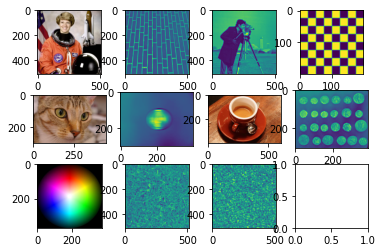

In [8]:
imshow_collection(collection);

---

### 2. Use the `scipy ndimage` and `misc` module's functions to zoom, crop, resize and apply Affine transformation to an image.
For this exercise we will make usage of the 'astronaut.jpg' image.
The first step is to load the required modules: 

In [9]:
from scipy.ndimage import zoom, affine_transform
# from scipy import misc
import imageio
from PIL import Image

**Remark**: misc.imread was deprecated in favour of imageio and misc.imresize for pillow: ```numpy.array(Image.fromarray(arr).resize()) ```





In [10]:
imc = imageio.imread(os.path.join(colab_path, 'astronaut.jpg'))

In [11]:
import matplotlib.pyplot as plt

Original input image:

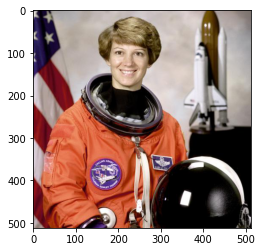

In [12]:
plt.imshow(imc);

- Zoomed image:



In [13]:
im = imageio.imread(os.path.join(colab_path, 'astronaut.jpg'), as_gray=True)

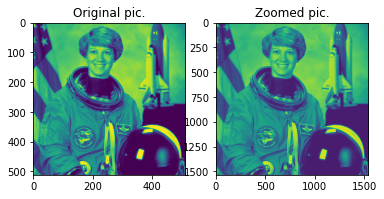

In [14]:
im_zoom = zoom(im, 3.0)

fig = plt.figure()
ax1 = fig.add_subplot(121)  # left side
plt.title('Original pic.')
ax2 = fig.add_subplot(122)  # right side
plt.title('Zoomed pic.')
ax1.imshow(im)
ax2.imshow(im_zoom)
plt.show()

- Cropping the image:

In [15]:
imc.shape

(512, 512, 3)

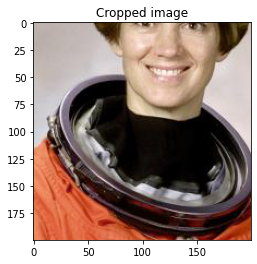

In [16]:
cropped = imc[100:300, 100:300, :]
plt.imshow(cropped)
plt.title('Cropped image');

- Resize Image:


In [17]:
imc.shape

(512, 512, 3)

In [18]:
# numpy.array(Image.fromarray(imc).resize()) 

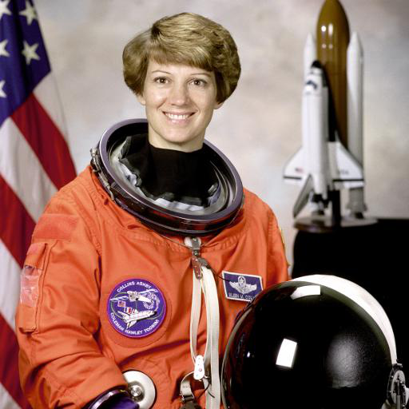

In [19]:
img = imc
factor = 0.8
astronaut = Image.fromarray(img).resize(size=(int(img.shape[0] * factor),
                                              int(img.shape[1] * factor)))
astronaut

In [20]:
np.array(astronaut).shape

(409, 409, 3)

- Affine transformation:

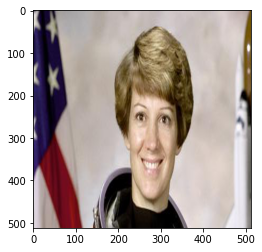

In [21]:
affine = affine_transform(imc, np.eye(3) * np.array([0.4, 0.8, 1]))
plt.imshow(affine);

Let's explore some transformations as:
- Translation
- Scale
- Rotation

Consider the Scale case, we have the scaling factor __*s*__ and the transformation matrix:

$\begin{bmatrix} s & 0 & 0 \\ 0 & s & 0 \\ 0 & 0 & 1 \end{bmatrix}$
<br><br>
For the translation(_k_, _t_):

$\begin{bmatrix} 1 & 0 & k \\ 0 & 1 & t \\ 0 & 0 & 1 \end{bmatrix}$
<br><br>
and rotation($\theta$):


$\begin{bmatrix} cos(\theta) & -sin(\theta) & 0 \\ sin(\theta) & -cos(\theta) & 0 \\ 0 & 0 & 1 \end{bmatrix}$

In [22]:
def translate(k, t):
    '''Translation transformation for affine_transform
    
    Parameter
    ---------
    k : float
    t : float
    
    '''
    m = np.eye(3)
    m[:2, 2] = [k, t]
    return m

In [23]:
translate(3,2)

array([[1., 0., 3.],
       [0., 1., 2.],
       [0., 0., 1.]])

In [24]:
def rotation(theta):
    '''Translation transformation for affine_transform
    
    Parameter
    ---------
    theta : float
        Angle to rotate
    
    '''
    m = np.eye(3)
    m[:2, :2] = np.array([[np.cos(theta), -np.sin(theta)], 
                          [np.sin(theta), -np.cos(theta)]])
    return m

In [25]:
def scale(factor):
  '''Scale transformation for affine_transform
  
  Parameter
  ---------
  factor : float
      scaling factor to apply

  '''
  m = np.eye(3)
  np.fill_diagonal(m, [factor, factor, 1])
  return m

I'll dig into 

In [26]:
scale(0.5)

array([[0.5, 0. , 0. ],
       [0. , 0.5, 0. ],
       [0. , 0. , 1. ]])

In [27]:
rotation(30)

array([[ 0.15425145,  0.98803162,  0.        ],
       [-0.98803162, -0.15425145,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

Now we can apply these functions to our astronaut image:

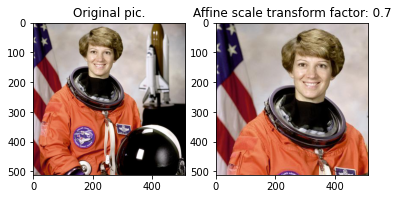

In [28]:
factor = 0.7
affine = affine_transform(imc, scale(factor))

fig = plt.figure()
ax1 = fig.add_subplot(121)  # left side
plt.title('Original pic.')
ax2 = fig.add_subplot(122)  # right side
plt.title(f'Affine scale transform factor: {factor}')
ax1.imshow(imc)
ax2.imshow(affine)
plt.show()

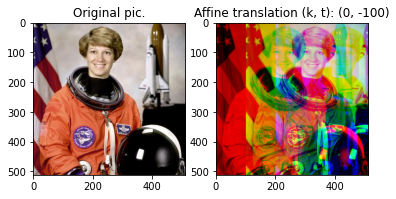

In [29]:
k = 0
t = - 100
affine = affine_transform(imc, translate(k, t))

fig = plt.figure()
ax1 = fig.add_subplot(121)  # left side
plt.title('Original pic.')
ax2 = fig.add_subplot(122)  # right side
plt.title(f'Affine translation (k, t): {k, t}')
ax1.imshow(imc)
ax2.imshow(affine)
plt.show()


---

### 3. Create a Python remake of the Gotham Instagram filter [link](https://github.com/lukexyz/CV-Instagram-Filters)

For this solution we will be using the steps in https://www.practicepython.org/blog/2016/12/20/instagram-filters-python.html.


In [30]:
from PIL import Image

In [31]:
colab_path

'/content/drive/My Drive/Hands_On_Image_Processing_with_Python/Chapter_1/'

In [32]:
img = Image.open(os.path.join(colab_path, 'astronaut.jpg'))


We can use the split method to obtain the chanels: 

In [33]:
r, g, b = img.split()

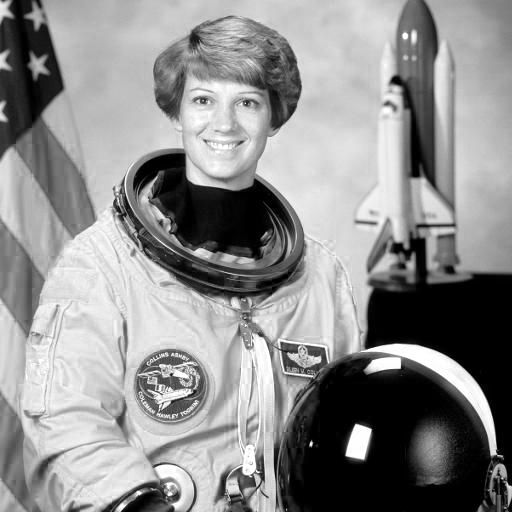

In [34]:
r

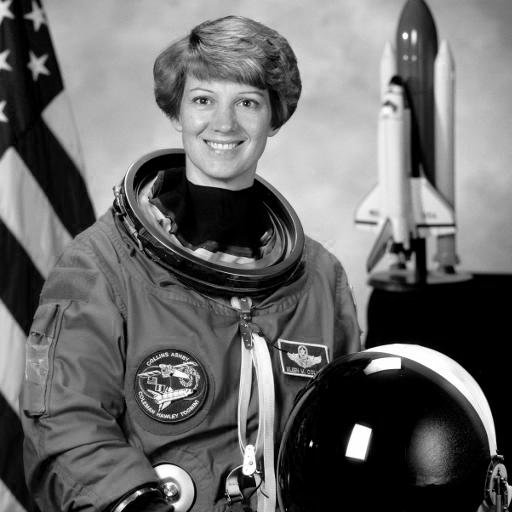

In [35]:
g

From the chanels we can merge them into the original image wi the merge method.

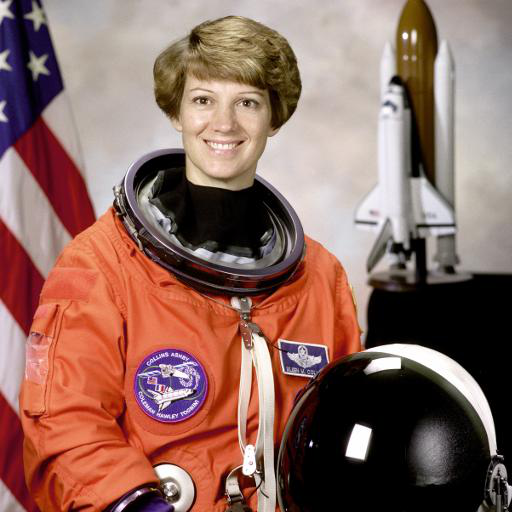

In [36]:
Image.merge('RGB', (r, g, b))

So, to create the gotham filter we can split the channels, apply the necessary transformations and merge them back into the modified image. First we have to refactor the original `channel_adjust` method:


In [37]:
np.array(r).flatten()

array([148, 112,  73, ...,   3,   7,   5], dtype=uint8)

In [38]:
def channel_adjust(channel, values):
    # preserve the original size, so we can reconstruct at the end
    channel = np.asarray(channel)
    orig_size = channel.shape
    # flatten the image into a single array
    flat_channel = channel.flatten()

    # this magical numpy function takes the values in flat_channel
    # and maps it from its range in [0, 1] to its new squeezed and
    # stretched range
    adjusted = np.interp(flat_channel, np.linspace(0, 1, len(values)), values)
    
    # put back into the original image shape
    channel_reshaped = adjusted.reshape(orig_size)
    return Image.fromarray(channel_reshaped, mode='L')

In [39]:
r_interp = channel_adjust(r, [0., 12.75, 25.5, 51., 76.5, 127.5, 178.5, 204., 229.5, 242.25, 255.])

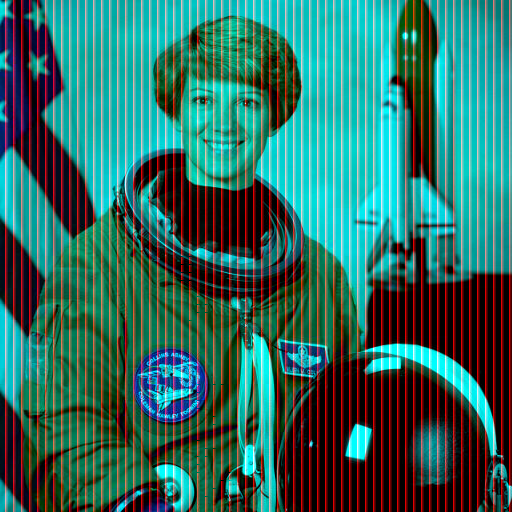

In [40]:
Image.merge('RGB', (r_interp, g, b))

### 4. Use scikit-image's `warp()` function to implement the swirl transform. Note that te `swirl` transform can also be expressed with the following equations:
$x(u,v)=(u-x_0)cos(\theta) + (v-y_0)sin(\theta) + x_0$ <br>
$y(u,v)=-(u-x_0)sin(\theta)+(v-y_0)cos(\theta)+y_0$ <br>
$r=\sqrt{(u-x_0)^2+(v-y_0)^2}$ <br>
$\theta=\frac{\pi r}{512}$

In [41]:
from skimage.transform import warp, swirl

In [42]:
im = imageio.imread(os.path.join(colab_path, 'coffee.jpg'), as_gray=False)

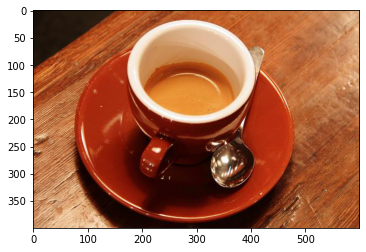

In [43]:
plt.imshow(im);

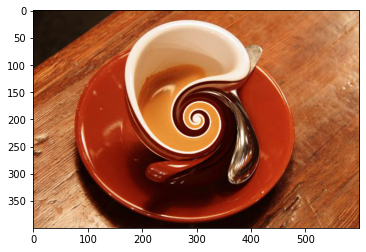

In [44]:
plt.imshow(swirl(im, rotation=0, strength=15, radius=200));

In [45]:
def swirl_mapping(xy, center):
    '''Custom swirl function mapping
    
    Parameters
    ----------
    xy : numpy.array
      A numpy array representing the image to apply the swirl transformation.
    center: tuple with center

    Returns
    -------
    xy : numpy.array with the new image mapping
    '''
    x, y = xy.T
    x0, y0 = center  

    rho = np.sqrt((x - x0) ** 2 + (y-y0) ** 2)
    theta = (np.pi * rho)/512
    xy[..., 0] = (x - x0) * np.cos(theta) + (y - y0) * np.sin(theta) + x0
    xy[..., 1] = - (x - x0) * np.sin(theta) + (y - y0) * np.cos(theta) + y0
    return xy


def custom_swirl(image, center=None):
    if center is None:
        center = np.array(image.shape)[:2][::-1] / 2
    warp_args = {'center': center}
    return warp(image, swirl_mapping, map_args=warp_args)

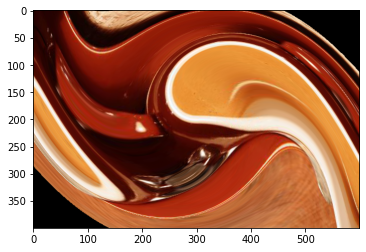

In [46]:
plt.imshow(custom_swirl(im));

### 5. Implement the wave transform (hint: use scikit-image's `warp()` given by the following):
$x(u,v)=u+20.sin(\frac{2\pi v}{64})$ <br>
$y(u,v)=v$

In [47]:
def wave_mapping(xy):
    '''Custom wave function mapping
    
    Parameters
    ----------
    xy : numpy.array
      A numpy array representing the image to apply the swirl transformation.
    center: tuple with center

    Returns
    -------
    xy : numpy.array with the new image mapping
    '''
    x, y = xy.T
    xy[..., 0] = x + 20 * np.sin((2 * np.pi * y)/64)
    xy[..., 1] = y
    return xy

def custom_wave(image):
    return warp(image, wave_mapping)

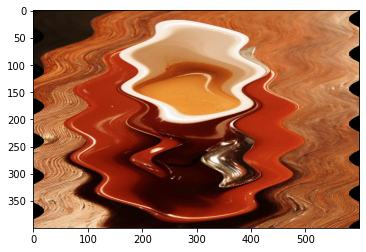

In [48]:
plt.imshow(custom_wave(im));

### 6. Use PIL to laod an RGB `.png` file with a pallete and convert into a grayscale image. This problem is tanek from this post: https://stackoverflow.com/questions/51676447/python-use-pil-to-load-png-file-gives-strange-results/5167828271. Convert the following RGB image (from the VOC2012 dataset) into a grayscale image by indexing the palette:



- First, reading the image from the url:


In [49]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

In [50]:
url = 'https://i.stack.imgur.com/xeU6N.png'
response = requests.get(url)
img = Image.open(BytesIO(response.content))

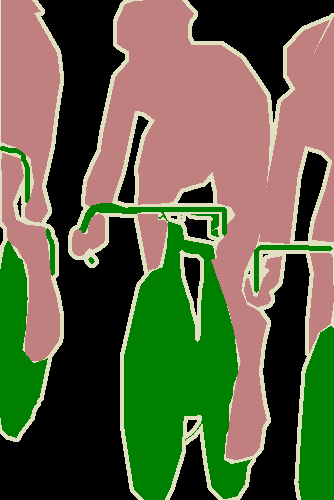

In [51]:
img # original image

- Reproducing the awkward behaviour:


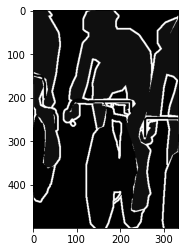

In [52]:
arr = np.array(img)
plt.imshow(arr, cmap='gray')

- Investigating:

In [53]:
arr.shape

(500, 334)

In [54]:
arr.max()

255

After some digging into Pillow documentation and [`Image.convert`](https://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.convert) method we can see how to convert to grayscale using the formula: 

$L = R * 299/1000 + G * 587/1000 + B * 114/1000$

So, we need two steps, first, the conversion to the *RGB* format and then to the *L* format:

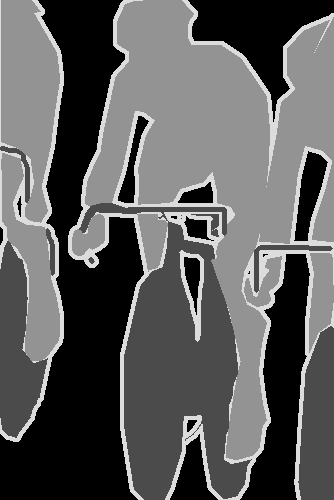

In [55]:
img.convert('RGB').convert('L')

Or using the imshow method:

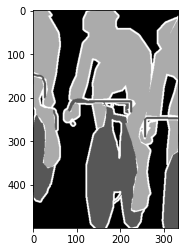

In [56]:
plt.imshow(img.convert('RGB').convert('L'), cmap='gray')

### 7. Make a 3D plot for each of the color channels of the parror image used in this chapter (hint: use the `mlp_toolkits.mplot3d` module's `plot_surface()` function and NumPy's `meshgrid()` function).

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from skimage.io import imread

In [58]:
? Axes3D.plot_surface

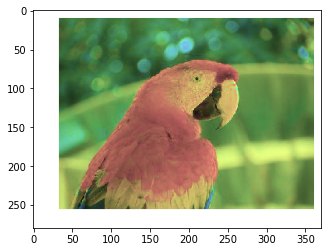

In [59]:
img = imread(os.path.join(colab_path, 'parrot.png'))
plt.imshow(img)

In [60]:
?np.meshgrid

In [61]:
img.shape[:2]

(280, 371)

In [62]:
ny, nx = img.shape[:2]
y = np.arange(ny)
x = np.arange(nx)
xv, yv = np.meshgrid(x, y)
xv

array([[  0,   1,   2, ..., 368, 369, 370],
       [  0,   1,   2, ..., 368, 369, 370],
       [  0,   1,   2, ..., 368, 369, 370],
       ...,
       [  0,   1,   2, ..., 368, 369, 370],
       [  0,   1,   2, ..., 368, 369, 370],
       [  0,   1,   2, ..., 368, 369, 370]])

In [63]:
z_red = img[:, :, 0]
z_green = img[:, :, 1]
z_blue = img[:, :, 2]

In [64]:
xv.shape

(280, 371)

In [65]:
z_red.shape

(280, 371)

In [66]:
z_red.max()

255

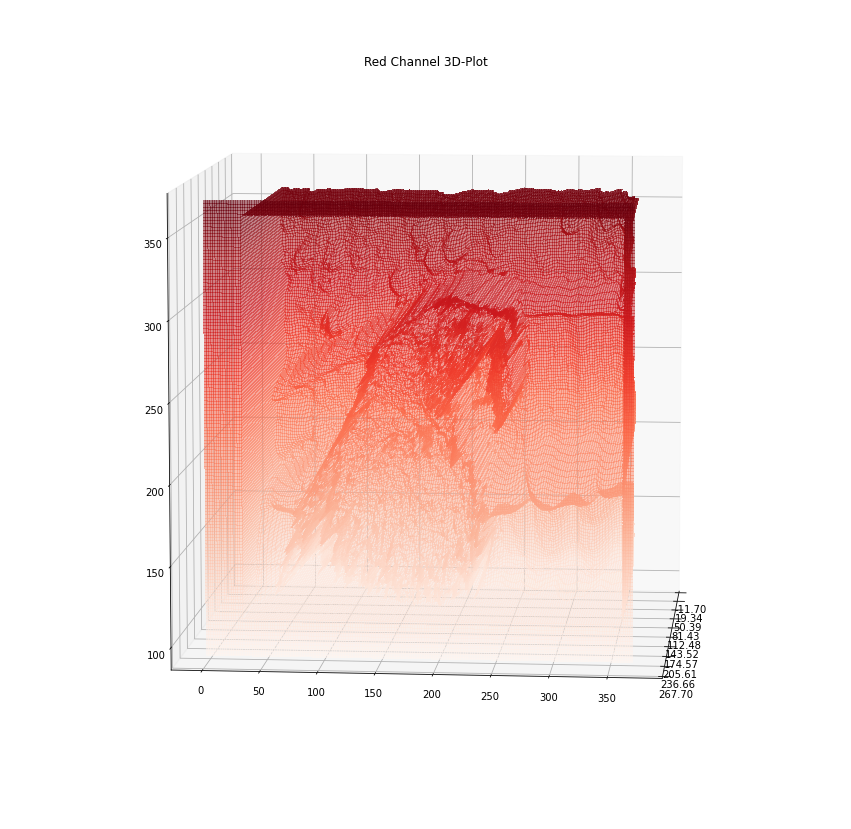

In [67]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(z_red, xv, nx-yv,  cmap='Reds', linewidth=0, antialiased=False, rstride=2, cstride=2, alpha=0.5)
ax.xaxis.set_major_locator(LinearLocator(10))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(elev=08., azim=5)
plt.title('Red Channel 3D-Plot'); 

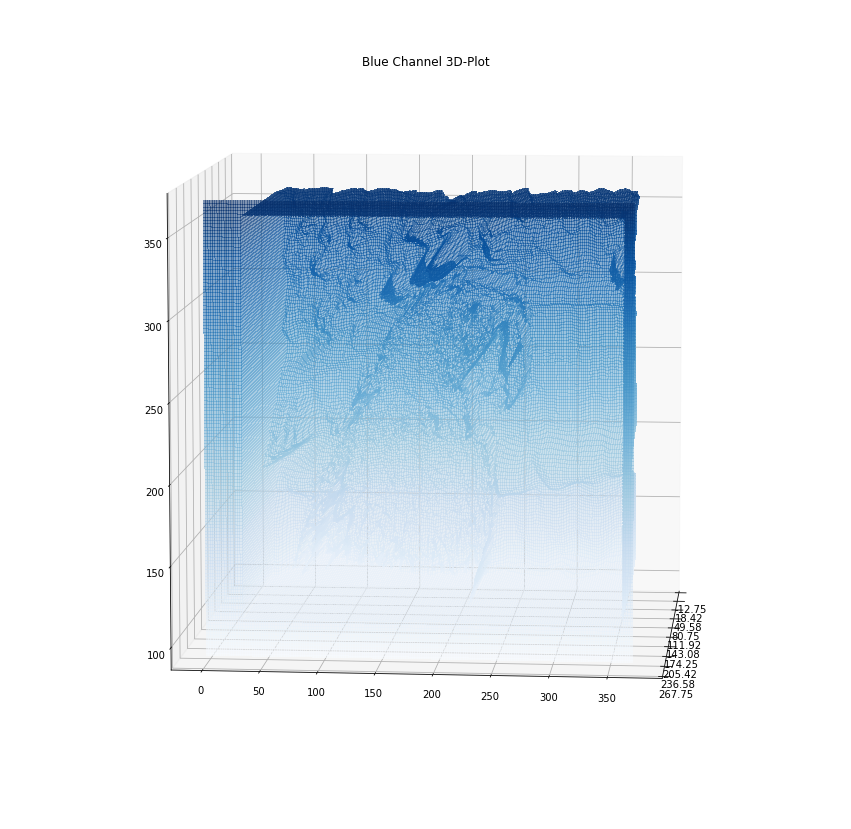

In [68]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(z_blue, xv, nx-yv,  cmap='Blues', linewidth=0, antialiased=False, rstride=2, cstride=2, alpha=0.5)
ax.xaxis.set_major_locator(LinearLocator(10))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(elev=08., azim=5)
plt.title('Blue Channel 3D-Plot'); 

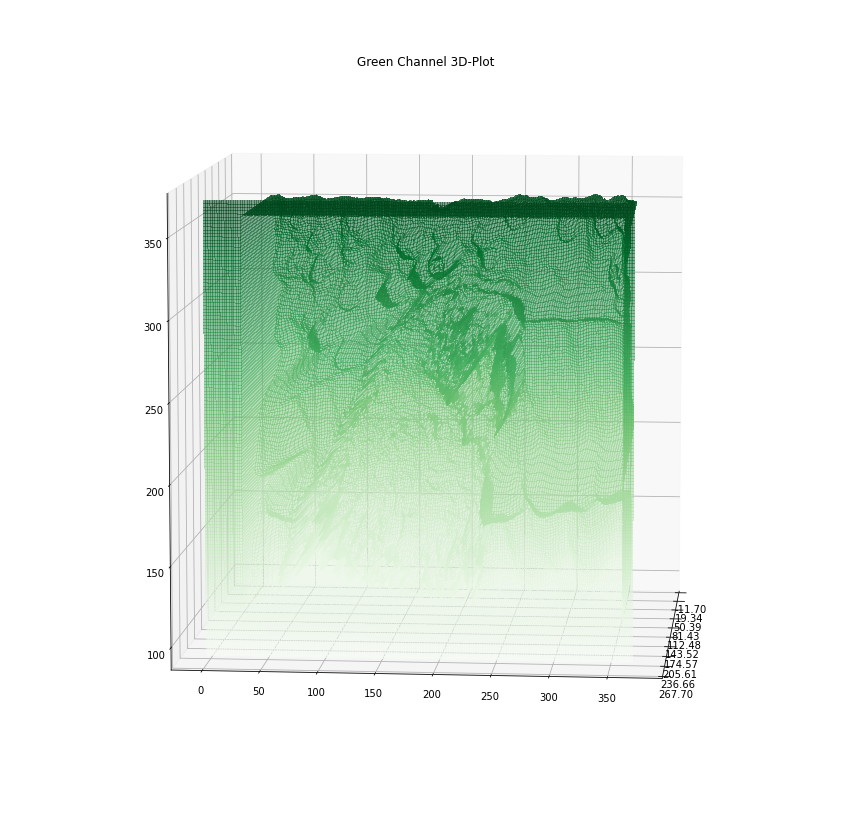

In [69]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(z_green, xv, nx-yv,  cmap='Greens', linewidth=0, antialiased=False, rstride=2, cstride=2, alpha=0.5)
ax.xaxis.set_major_locator(LinearLocator(10))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.view_init(elev=08., azim=5)
plt.title('Green Channel 3D-Plot'); 

### 8. Use scikit-image's `transform` module's `ProejctiveTransform` to estimate the homography matrix from a source to a destination image and use the `inverse()` function to embed the Lena image (or yours) in the blank canvas as shown in the following:


In [70]:
from skimage.io import imread, imshow
from skimage.transform import ProjectiveTransform
from matplotlib.path import Path
from matplotlib.patches import Rectangle

I'll try to solve this problem using a different board image:


In [71]:
board_url = 'https://5.imimg.com/data5/DN/HB/MY-26687151/white-board-with-stand-500x500.jpg'
lena_url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'

In [72]:
board = imread(board_url)
lena = imread(lena_url)

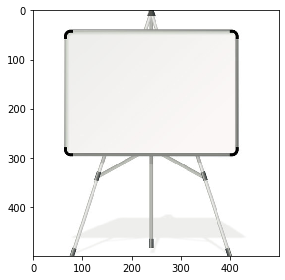

In [73]:
imshow(board)

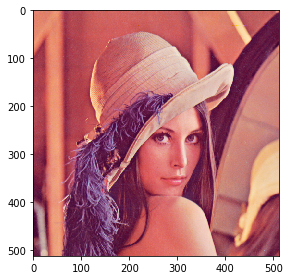

In [74]:
imshow(lena)

In [75]:
?ProjectiveTransform

In [76]:
board.shape, lena.shape

((500, 500, 3), (512, 512, 3))

In [77]:
pt = ProjectiveTransform()
width, height = lena.shape[:2]

In [78]:
src = np.array([[   0.,    0.],
       [height-1,    0.],
       [height-1,  width-1],
       [   0.,  width-1]])

In [79]:
src

array([[  0.,   0.],
       [511.,   0.],
       [511., 511.],
       [  0., 511.]])

In [80]:
dst = np.array(
    [[75., 70.],
     [400., 70.],
     [400., 270.],
     [ 75., 270.]
     ])

In [81]:
pt.estimate(src, dst)

True

In [82]:
width, height = board.shape[:2]

poly_path = Path(dst)

x, y = np.mgrid[:height, :width]
coors = np.hstack((x.reshape(-1, 1), y.reshape(-1,1))) 

mask = poly_path.contains_points(coors)
mask = mask.reshape(height, width)

dst_indices = np.array([list(x) for x in list(zip(*np.where(mask > 0)))])
src_indices = np.round(pt.inverse(dst_indices), 0).astype(int)
src_indices[:,0], src_indices[:,1] = src_indices[:,1], src_indices[:,0].copy()
im_out = np.copy(board)
im_out[dst_indices[:,1], dst_indices[:,0]] = lena[src_indices[:,0], src_indices[:,1]]

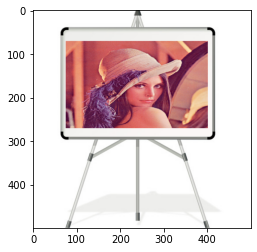

In [83]:
plt.imshow(im_out, cmap='gray');